In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.gradient_descent_model import GradienDescentModel
from models.least_squares_model import LeastSquaresModel

%matplotlib inline

Для воспроизводимости результатов зафиксируем random seed

In [2]:
np.random.seed(92)

### Задача

Обучить модель, апроксимирующую функцию $y = 5x + 2$

In [3]:
def func(x):
    return 5 * x + 2

Определим наборы данных

In [4]:
dataset_len = 30

X = np.linspace(dataset_len / -2, dataset_len / 2, dataset_len)
noise = np.random.randn(dataset_len)
Y = func(X) + noise

Для достижения большей репрезентативности выборок берется каждое 3 значение

In [5]:
x_train, x_val, x_test = X[0::3], X[1::3], X[2::3]
y_train, y_val, y_test = Y[0::3], Y[1::3], Y[2::3]

Перемешаем каждый набор данных

In [6]:
train_indexes = np.random.permutation(x_train.shape[0])
val_indexes = np.random.permutation(x_val.shape[0])
test_indexes = np.random.permutation(x_test.shape[0])

x_train, y_train = x_train[train_indexes], y_train[train_indexes]
x_val, y_val = x_val[val_indexes], y_val[val_indexes]
x_test, y_test = x_test[test_indexes], y_test[test_indexes]

На графике приближаемая функция выглядит следующим образом:

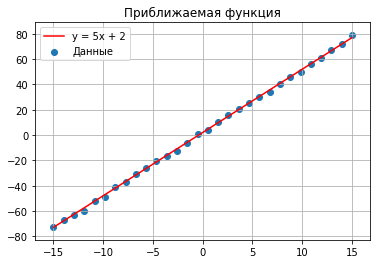

In [7]:
plt.plot(X, func(X), 'r', label='y = 5x + 2')
plt.scatter(X, Y, label='Данные')
plt.title('Приближаемая функция')
plt.legend()
plt.grid()

### Функция ошибок

В качестве loss-функции используется MSE

$$MSE = \frac{1}{n} * \sum_{i=1}^n (y_{pred}(i) - y_{expected}(i))^2 $$

In [8]:
def MSE(y_predicted, y_expected):
    return np.square(y_predicted - y_expected).mean()

Значение loss-функции между "чистыми" и зашумленными данными

In [9]:
MSE(func(X), Y)

0.9745288160360753

Для решения задачи линейной регрессии наиболее часто используют 2 метода:
* метод градиентного спуска
* метод наименьших квадратов

#### Модель, использующая метод градиентного спуска

In [10]:
gradient_descent_model = GradienDescentModel()

In [11]:
gradient_descent_model.fit(x_train, y_train, x_val, y_val, epochs_number=1500, verbose=100);

100: train_loss: 1.213558913479291; val_loss: 0.7968233007621409
200: train_loss: 1.1872786459016287; val_loss: 0.629334335756177
300: train_loss: 1.1867048781044924; val_loss: 0.6122731522691622
400: train_loss: 1.1866719461366013; val_loss: 0.6103131371480887
500: train_loss: 1.1866685629820837; val_loss: 0.6100844848271569
600: train_loss: 1.186668173872261; val_loss: 0.6100577621742496
700: train_loss: 1.1866681284730898; val_loss: 0.6100546384281099
800: train_loss: 1.1866681231671916; val_loss: 0.6100542732685524
900: train_loss: 1.1866681225469542; val_loss: 0.6100542305820091
1000: train_loss: 1.1866681224744506; val_loss: 0.6100542255920252
1100: train_loss: 1.1866681224659779; val_loss: 0.61005422500871
1200: train_loss: 1.1866681224649835; val_loss: 0.6100542249405196
1300: train_loss: 1.1866681224648679; val_loss: 0.6100542249325444
1400: train_loss: 1.1866681224648528; val_loss: 0.6100542249316081
Early stopping. Epoch 1403. Current loss: 0.6100542249316122


#### Модель, использующая метод наименьших квадратов

In [12]:
least_square_model = LeastSquaresModel()

In [13]:
least_square_model.fit(x_train, y_train)

Веса обученных моделей:

In [14]:
gradient_descent_model.get_weights()

(array([[5.02561299]]), array([[1.50438537]]))

In [15]:
least_square_model.get_weights()

(array([[5.00438672]]), array([[1.49635251]]))

### Визуализация результатов

Сравним значения приближаемой и полученной в результате применения каждой модели

In [16]:
expected_model_prediction = func(x_test)
gd_model_prediction = gradient_descent_model.predict(x_test).reshape(-1)
ls_model_prediction = least_square_model.predict(x_test).reshape(-1)

expected_model_loss = MSE(expected_model_prediction, y_test)
gd_model_loss = MSE(gd_model_prediction, y_test)
ls_model_loss = MSE(ls_model_prediction, y_test)

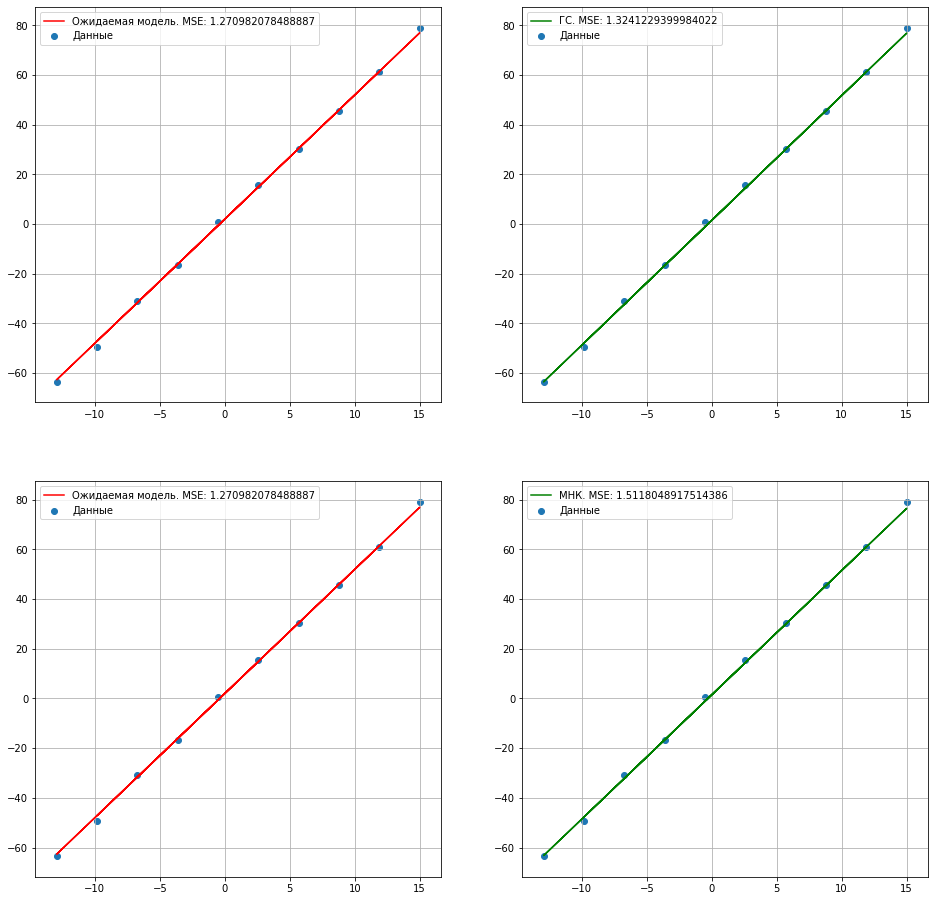

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

ax[0][0].plot(x_test, expected_model_prediction, 'r', label=f'Ожидаемая модель. MSE: {expected_model_loss}')
ax[0][0].scatter(x_test, y_test, label='Данные')
ax[0][0].legend()
ax[0][0].grid()

ax[0][1].plot(x_test, gd_model_prediction, 'g', label=f'ГС. MSE: {gd_model_loss}')
ax[0][1].scatter(x_test, y_test, label='Данные')
ax[0][1].legend()
ax[0][1].grid()

ax[1][0].plot(x_test, expected_model_prediction, 'r', label=f'Ожидаемая модель. MSE: {expected_model_loss}')
ax[1][0].scatter(x_test, y_test, label='Данные')
ax[1][0].legend()
ax[1][0].grid()

ax[1][1].plot(x_test, ls_model_prediction, 'g', label=f'МНК. MSE: {ls_model_loss}')
ax[1][1].scatter(x_test, y_test, label='Данные')
ax[1][1].legend()
ax[1][1].grid()

plt.show()